In [1]:
import numpy as np
pi=np.pi
from functools import partial
#
import matplotlib.pyplot as plt
import matplotlib as mpl

In [2]:
import phasr as phr

In [3]:
phr.__version__

'0.2.5.dev1+g28b07b4'

# Nuclei

In [4]:
# Coulomb
nucleus_coulomb = phr.nucleus('Al27_coulomb',Z=13,A=27)

In [5]:
# Fourier Bessel
ai_Al27=np.array([0.43418e-1,0.60298e-1,0.28950e-2,-0.23522e-1,-0.79791e-2,0.23010e-2,0.10794e-2,0.12574e-3,-0.13021e-3,0.56563e-4,-0.18011e-4,0.42869e-5])
nucleus_FB = phr.nucleus('Al27_FB',Z=13,A=27,ai=ai_Al27,R=7)

In [6]:
from mpmath import polylog

In [7]:
polylog(2,-np.exp(3.07/0.519))

mpf('-19.137160992678471')

In [8]:
# Fermi (2 parameter)
nucleus_2pF = phr.nucleus('Al27_2pF',Z=13,A=27,c=3.07,z=0.519)
nucleus_2pF.fill_gaps()

data loaded from  ./tmp/nucleus_splines/electric_field_Al27_2pFfermi2p_x=0.0-20.0-0.02.txt
data loaded from  ./tmp/nucleus_splines/electric_potential_Al27_2pFfermi2p_x=0.0-20.0-0.02.txt
data loaded from  ./tmp/nucleus_splines/form_factor_Al27_2pFfermi2p_x=0.0-1000.0-1.0.txt


In [9]:
# Gauss
nucleus_gauss = phr.nucleus('Al27_gauss',Z=13,A=27,b=2.48)

In [10]:
# Uniform
nucleus_uni = phr.nucleus('Al27_uni',Z=13,A=27,rc=3.92)

In [11]:
# oszillator basis (shell model)
Cs_M00_Al27=np.array([27, -11.3343, 0.837814])
Cs_M01_Al27=np.array([2*13-27, 0.666696, -0.0858552])
Cs_Phipp00_Al27=np.array([-4.98975 , 0.997985])
Cs_Phipp01_Al27=np.array([0.303398 , -0.0606814])
Ci_dict_Al27={'M00':Cs_M00_Al27,'M01':Cs_M01_Al27,'Phipp00':Cs_Phipp00_Al27,'Phipp01':Cs_Phipp01_Al27}
nucleus_osz = phr.nucleus('Al27_osz',Z=13,A=27,Ci_dict=Ci_dict_Al27)

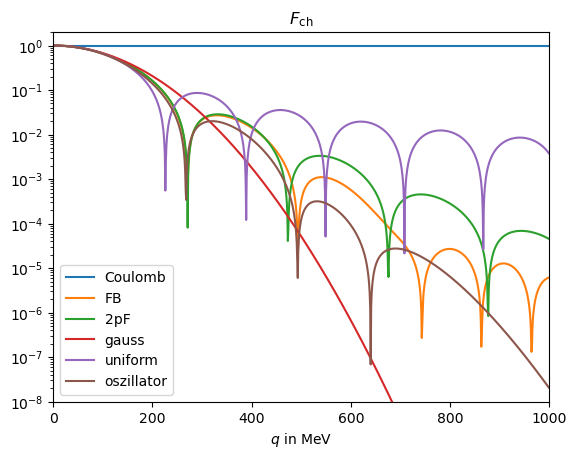

In [12]:
q=np.arange(1,1000,1.)
plt.plot(q,np.abs(nucleus_coulomb.form_factor(q)),label='Coulomb')
plt.plot(q,np.abs(nucleus_FB.form_factor(q)),label='FB')
plt.plot(q,np.abs(nucleus_2pF.form_factor(q)),label='2pF')
plt.plot(q,np.abs(nucleus_gauss.form_factor(q)),label='gauss')
plt.plot(q,np.abs(nucleus_uni.form_factor(q)),label='uniform')
plt.plot(q,np.abs(nucleus_osz.form_factor(q)),label='oszillator')
plt.title(r'$F_\operatorname{ch}$')
plt.xlabel(r'$q$ in MeV')
plt.ylim(1e-8,2)
plt.xlim(0,1000)
plt.yscale('log')
plt.legend()
plt.show()

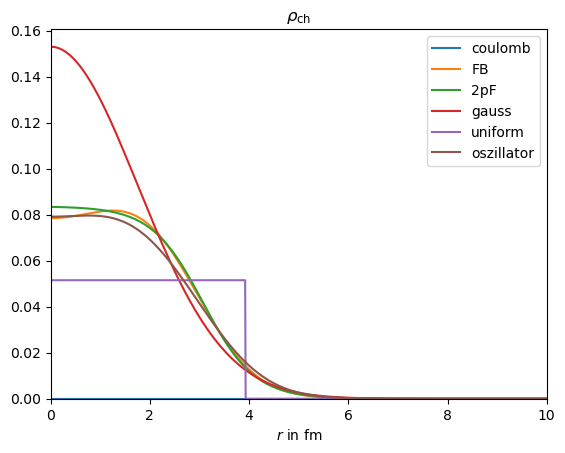

In [13]:
r=np.arange(0,10,1e-2)
plt.plot(r,nucleus_coulomb.charge_density(r),label='coulomb')
plt.plot(r,nucleus_FB.charge_density(r),label='FB')
plt.plot(r,nucleus_2pF.charge_density(r),label='2pF')
plt.plot(r,nucleus_gauss.charge_density(r),label='gauss')
plt.plot(r,nucleus_uni.charge_density(r),label='uniform')
plt.plot(r,nucleus_osz.charge_density(r),label='oszillator')
plt.xlim(0,10)
plt.ylim(0,)
plt.title(r'$\rho_\operatorname{ch}$')
plt.xlabel(r'$r$ in fm')
plt.legend()
plt.show()

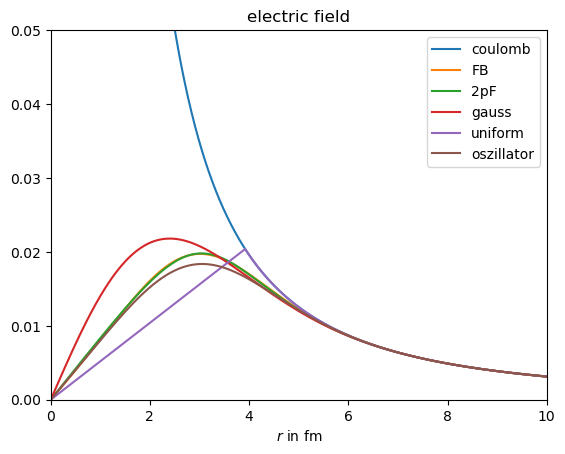

In [14]:
r=np.arange(1e-2,10,1e-2)
plt.plot(r,nucleus_coulomb.electric_field(r),label='coulomb')
plt.plot(r,nucleus_FB.electric_field(r),label='FB')
plt.plot(r,nucleus_2pF.electric_field(r),label='2pF')
plt.plot(r,nucleus_gauss.electric_field(r),label='gauss')
plt.plot(r,nucleus_uni.electric_field(r),label='uniform')
plt.plot(r,nucleus_osz.electric_field(r),label='oszillator')
plt.xlim(0,10)
plt.ylim(0,0.05)
plt.title(r'electric field')
plt.xlabel(r'$r$ in fm')
plt.legend()
plt.show()

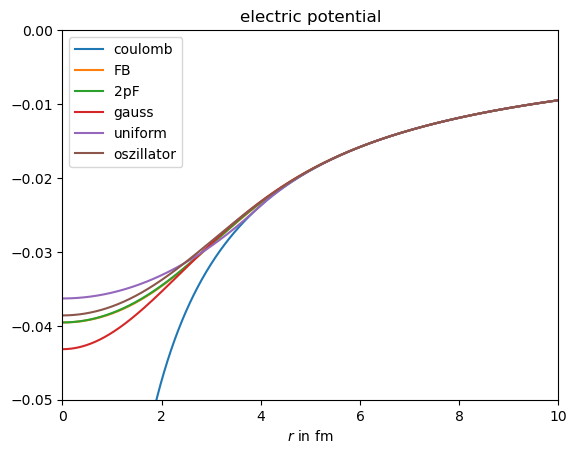

In [15]:
r=np.arange(1e-2,10,1e-2)
plt.plot(r,nucleus_coulomb.electric_potential(r),label='coulomb')
plt.plot(r,nucleus_FB.electric_potential(r),label='FB')
plt.plot(r,nucleus_2pF.electric_potential(r),label='2pF')
plt.plot(r,nucleus_gauss.electric_potential(r),label='gauss')
plt.plot(r,nucleus_uni.electric_potential(r),label='uniform')
plt.plot(r,nucleus_osz.electric_potential(r),label='oszillator')
plt.ylim(-0.05,0)
plt.xlim(0,10)
plt.title(r'electric potential')
plt.xlabel(r'$r$ in fm')
plt.legend()
plt.show()

## References (mainly de Vries et al. 1987)

In [16]:
nuclei={}
previous = ('',0,0)
for (name,A,Z) in phr.nuclei.references.onfile:
    if previous != (name,A,Z):
        nucleus = phr.nuclei.references.load_reference_nucleus(Z=Z,A=A)
        counter = 1
        if type(nucleus)==list:
            for nucleus_i in nucleus:
                nuclei[name+'_ref'+str(counter)] = nucleus_i
                counter+=1
        else:
            nuclei[name+'_ref'+str(counter)] = nucleus
        previous = (name,A,Z)

Warning total charge for 6Li_ref1 deviates more than 1e-3: Z=3, Q=2.9911703492816275
Warning total charge for 10B_ref1 deviates more than 1e-3: Z=5, Q=5.040468192885473
Warning total charge for 64Ni_ref1 deviates more than 1e-3: Z=28, Q=27.93996979272232


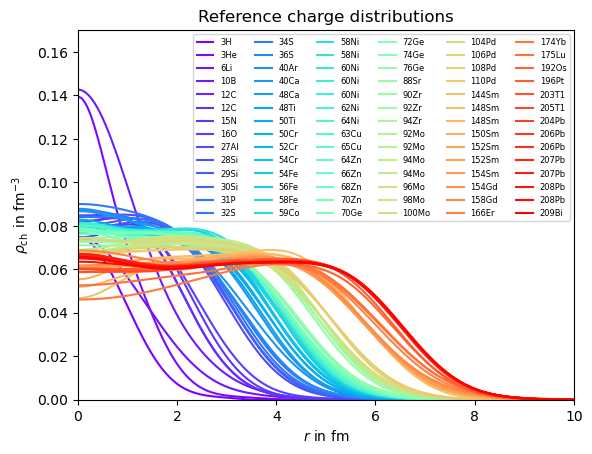

In [17]:
N=len(nuclei)
mpl.rcParams['axes.prop_cycle'] = mpl.cycler("color", mpl.cm.rainbow(np.linspace(0,1,N))) #mpl.cycler(color=["r", "k", "c"]) 

r=np.arange(0,12,1e-2)
for nucleus_name in nuclei:
    nucleus = nuclei[nucleus_name]
    plt.plot(r,nucleus.charge_density(r),label=nucleus_name[:-5])
plt.xlim(0,10)
plt.ylim(0,0.17)
plt.title(r'Reference charge distributions')
plt.ylabel(r'$\rho_\operatorname{ch}$ in fm$^{-3}$')
plt.xlabel(r'$r$ in fm')
plt.legend(loc='upper right',fontsize=6,ncol=6)
plt.show()
mpl.rcParams['axes.prop_cycle'] = mpl.cycler("color", mpl.cm.tab10(np.linspace(0,1,10)))

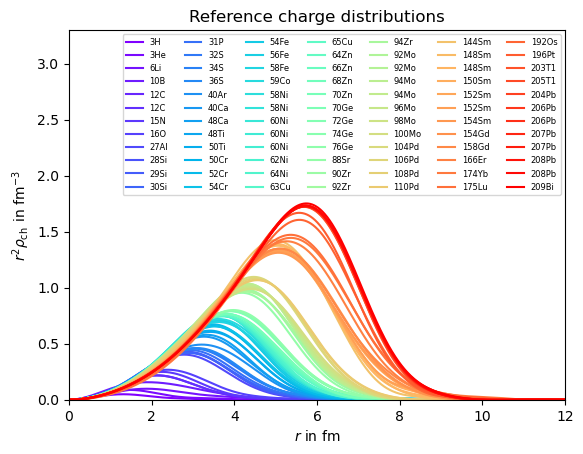

In [18]:
N=len(nuclei)
mpl.rcParams['axes.prop_cycle'] = mpl.cycler("color", mpl.cm.rainbow(np.linspace(0,1,N))) #mpl.cycler(color=["r", "k", "c"]) 

r=np.arange(0,15,1e-2)
for nucleus_name in nuclei:
    nucleus = nuclei[nucleus_name]
    plt.plot(r,r**2*nucleus.charge_density(r),label=nucleus_name[:-5])
plt.xlim(0,12)
plt.ylim(0,3.3)
plt.title(r'Reference charge distributions')
plt.ylabel(r'$r^2\rho_\operatorname{ch}$ in fm$^{-3}$')
plt.xlabel(r'$r$ in fm')
plt.legend(loc='upper right',fontsize=6,ncol=7)
plt.show()
mpl.rcParams['axes.prop_cycle'] = mpl.cycler("color", mpl.cm.tab10(np.linspace(0,1,10)))

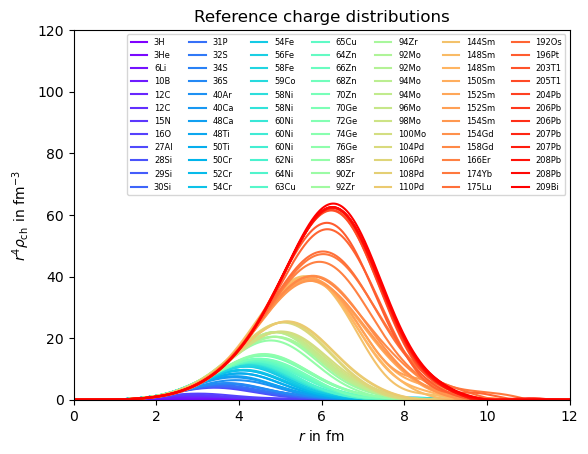

In [19]:
N=len(nuclei)
mpl.rcParams['axes.prop_cycle'] = mpl.cycler("color", mpl.cm.rainbow(np.linspace(0,1,N))) #mpl.cycler(color=["r", "k", "c"]) 

r=np.arange(0,15,1e-2)
for nucleus_name in nuclei:
    nucleus = nuclei[nucleus_name]
    plt.plot(r,r**4*nucleus.charge_density(r),label=nucleus_name[:-5])
plt.xlim(0,12)
plt.ylim(0,120)
plt.title(r'Reference charge distributions')
plt.ylabel(r'$r^4\rho_\operatorname{ch}$ in fm$^{-3}$')
plt.xlabel(r'$r$ in fm')
plt.legend(loc='upper right',fontsize=6,ncol=7)
plt.show()
mpl.rcParams['axes.prop_cycle'] = mpl.cycler("color", mpl.cm.tab10(np.linspace(0,1,10)))

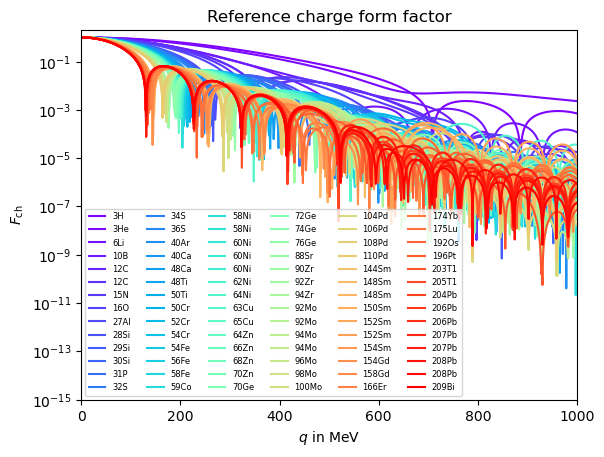

In [20]:
N=len(nuclei)
mpl.rcParams['axes.prop_cycle'] = mpl.cycler("color", mpl.cm.rainbow(np.linspace(0,1,N))) #mpl.cycler(color=["r", "k", "c"]) 

q=np.arange(1,1000,1.)
for nucleus_name in nuclei:
    nucleus = nuclei[nucleus_name]
    plt.plot(q,np.abs(nucleus.form_factor(q)),label=nucleus_name[:-5])
plt.ylim(1e-15,2)
plt.xlim(0,1000)
plt.title(r'Reference charge form factor')
plt.yscale('log')
plt.ylabel(r'$F_\operatorname{ch}$')
plt.xlabel(r'$q$ in MeV')
plt.legend(loc='lower left',fontsize=6,ncol=6)
plt.show()
mpl.rcParams['axes.prop_cycle'] = mpl.cycler("color", mpl.cm.tab10(np.linspace(0,1,10)))

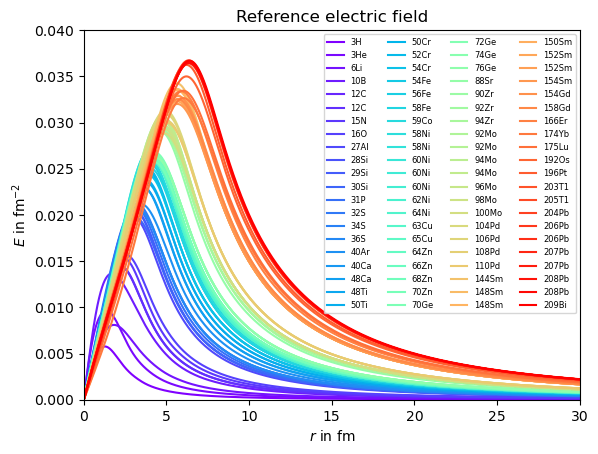

In [21]:
N=len(nuclei)
mpl.rcParams['axes.prop_cycle'] = mpl.cycler("color", mpl.cm.rainbow(np.linspace(0,1,N))) #mpl.cycler(color=["r", "k", "c"]) 

r=np.arange(0,30,1e-2)
for nucleus_name in nuclei:
    nucleus = nuclei[nucleus_name]
    plt.plot(r,nucleus.electric_field(r),label=nucleus_name[:-5])
plt.xlim(0,30)
plt.ylim(0,0.04)
plt.title(r'Reference electric field')
plt.ylabel(r'$E$ in fm$^{-2}$')
plt.xlabel(r'$r$ in fm')
plt.legend(loc='upper right',fontsize=6,ncol=4)
plt.show()
mpl.rcParams['axes.prop_cycle'] = mpl.cycler("color", mpl.cm.tab10(np.linspace(0,1,10)))

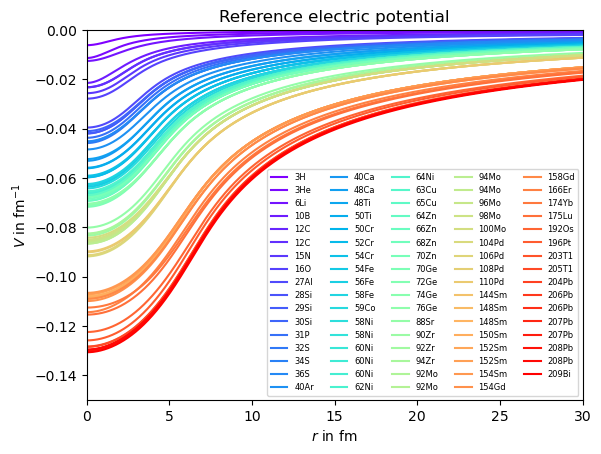

In [22]:
N=len(nuclei)
mpl.rcParams['axes.prop_cycle'] = mpl.cycler("color", mpl.cm.rainbow(np.linspace(0,1,N))) #mpl.cycler(color=["r", "k", "c"]) 

r=np.arange(0,30,1e-2)
for nucleus_name in nuclei:
    nucleus = nuclei[nucleus_name]
    plt.plot(r,nucleus.electric_potential(r),label=nucleus_name[:-5])
plt.ylim(-0.15,0)
plt.xlim(0,30)
plt.title(r'Reference electric potential')
plt.ylabel(r'$V$ in fm$^{-1}$')
plt.xlabel(r'$r$ in fm')
plt.legend(loc='lower right',fontsize=6,ncol=5)
plt.show()
mpl.rcParams['axes.prop_cycle'] = mpl.cycler("color", mpl.cm.tab10(np.linspace(0,1,10)))

# Boundstates

In [23]:
# Fourier Bessel
ai_Al27=np.array([0.43418e-1,0.60298e-1,0.28950e-2,-0.23522e-1,-0.79791e-2,0.23010e-2,0.10794e-2,0.12574e-3,-0.13021e-3,0.56563e-4,-0.18011e-4,0.42869e-5])
nucleus_Al27 = phr.nucleus('Al27_FB',Z=13,A=27,ai=ai_Al27,R=7)

In [24]:
boundstates_l0_Al27 = phr.boundstates(nucleus_Al27,kappa=-1,lepton_mass=phr.masses.mmu) 
print('E_1s=',boundstates_l0_Al27.energy_levels[0],'MeV') 

E_1s= -0.4650383801521656 MeV


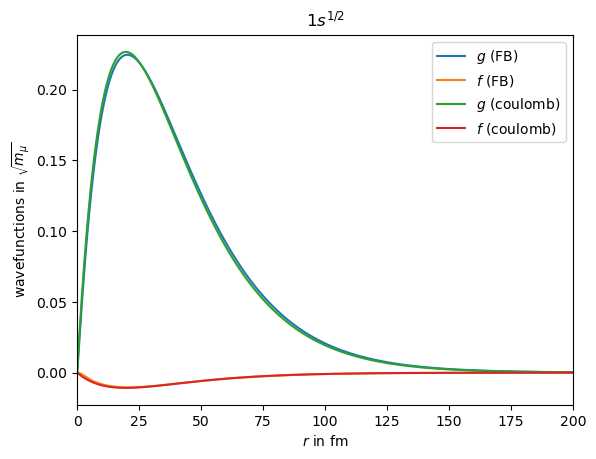

In [25]:
r=np.arange(0,200,0.1)

plt.plot(r,boundstates_l0_Al27.wavefunction_g_1s12(r),label=r'$g$ (FB)')
plt.plot(r,boundstates_l0_Al27.wavefunction_f_1s12(r),label=r'$f$ (FB)')

f_c=lambda r: phr.nuclei.parameterizations.coulomb.f_coulomb_nk(r,n=1,kappa=-1,Z=13,mass=phr.masses.mmu)/np.sqrt(phr.masses.mmu)
g_c=lambda r: phr.nuclei.parameterizations.coulomb.g_coulomb_nk(r,n=1,kappa=-1,Z=13,mass=phr.masses.mmu)/np.sqrt(phr.masses.mmu)
plt.plot(r,np.real(g_c(r)),label=r'$g$ (coulomb)')
plt.plot(r,np.real(f_c(r)),label=r'$f$ (coulomb)')

plt.title(r'$1s^{1/2}$')
plt.xlim(0,200)
plt.xlabel(r'$r$ in fm')
plt.ylabel(r'wavefunctions in $\sqrt{m_\mu}$')
plt.legend()

#plt.ylim(-1e0,1e0)

In [26]:
boundstates_l0_Al27.find_next_solution() 
print('E_2s=',boundstates_l0_Al27.energy_levels[1],'MeV') 

E_2s= -0.11774970562665743 MeV


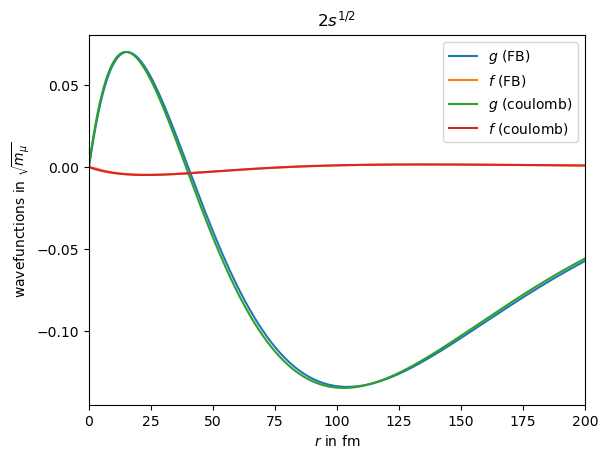

In [27]:
r=np.arange(0,200,0.1)

plt.plot(r,boundstates_l0_Al27.wavefunction_g_2s12(r),label=r'$g$ (FB)')
plt.plot(r,boundstates_l0_Al27.wavefunction_f_2s12(r),label=r'$f$ (FB)')

f_c=lambda r: phr.nuclei.parameterizations.coulomb.f_coulomb_nk(r,n=2,kappa=-1,Z=13,mass=phr.masses.mmu)/np.sqrt(phr.masses.mmu)
g_c=lambda r: phr.nuclei.parameterizations.coulomb.g_coulomb_nk(r,n=2,kappa=-1,Z=13,mass=phr.masses.mmu)/np.sqrt(phr.masses.mmu)
plt.plot(r,np.real(g_c(r)),label=r'$g$ (coulomb)')
plt.plot(r,np.real(f_c(r)),label=r'$f$ (coulomb)')

plt.title(r'$2s^{1/2}$')
plt.xlim(0,200)
plt.xlabel(r'$r$ in fm')
plt.ylabel(r'wavefunctions in $\sqrt{m_\mu}$')
plt.legend()

#plt.ylim(-1e0,1e0)

In [28]:
boundstates_l1_Al27 = phr.boundstates(nucleus_Al27,kappa=+1,lepton_mass=phr.masses.mmu) 
print('E_2p12=',boundstates_l1_Al27.energy_levels[0],'MeV') 

E_2p12= -0.11921144660932725 MeV


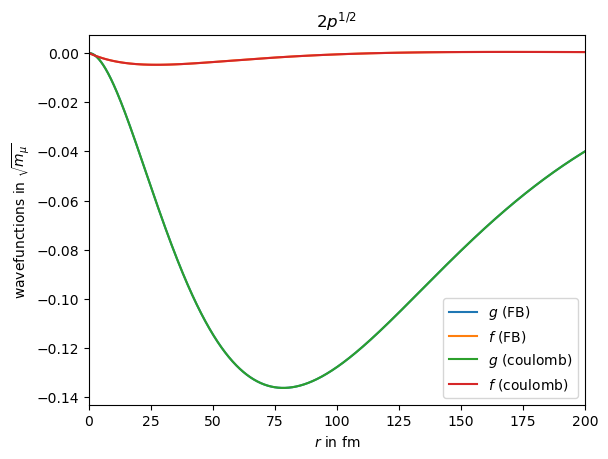

In [29]:
r=np.arange(0,200,0.1)

plt.plot(r,boundstates_l1_Al27.wavefunction_g_2p12(r),label=r'$g$ (FB)')
plt.plot(r,boundstates_l1_Al27 .wavefunction_f_2p12(r),label=r'$f$ (FB)')

f_c=lambda r: phr.nuclei.parameterizations.coulomb.f_coulomb_nk(r,n=2,kappa=+1,Z=13,mass=phr.masses.mmu)/np.sqrt(phr.masses.mmu)
g_c=lambda r: phr.nuclei.parameterizations.coulomb.g_coulomb_nk(r,n=2,kappa=+1,Z=13,mass=phr.masses.mmu)/np.sqrt(phr.masses.mmu)
plt.plot(r,np.real(g_c(r)),label=r'$g$ (coulomb)')
plt.plot(r,np.real(f_c(r)),label=r'$f$ (coulomb)')

plt.title(r'$2p^{1/2}$')
plt.xlim(0,200)
plt.xlabel(r'$r$ in fm')
plt.ylabel(r'wavefunctions in $\sqrt{m_\mu}$')
plt.legend()

#plt.ylim(-1e0,1e0)

# Continuumstates

In [30]:
# Fourier Bessel
ai_Al27=np.array([0.43418e-1,0.60298e-1,0.28950e-2,-0.23522e-1,-0.79791e-2,0.23010e-2,0.10794e-2,0.12574e-3,-0.13021e-3,0.56563e-4,-0.18011e-4,0.42869e-5])
nucleus_Al27 = phr.nucleus('Al27_FB',Z=13,A=27,ai=ai_Al27,R=7)

In [31]:
continuumstates_l0_Al27 = phr.continuumstates(nucleus_Al27,kappa=-1,energy=250,verbose=True)
continuumstates_l0_Al27.solve_IVP()

r0= 0.0057 fm
rc= 6.6 fm
y0= [ 0.09238163 -0.00022932]
g_c (unnormalized) = 9.602984298537397
f_c (unnormalized) = -8.994435287754722
A/B= -0.3950581069097453
 A = -5.717774655416386
 B = 14.473249771134718
norm 8.774252822325556


(0.0, 50.0)

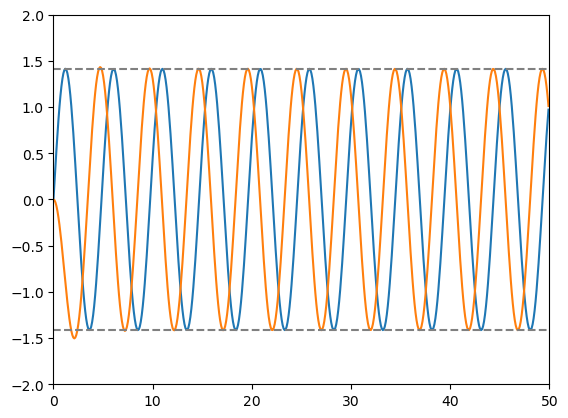

In [32]:
r=np.arange(0,50,0.1)
plt.plot(r,continuumstates_l0_Al27.wavefct_g(r))
plt.plot(r,continuumstates_l0_Al27.wavefct_f(r))
plt.plot(r,r*0+np.sqrt(2),color='gray',linestyle='--')
plt.plot(r,r*0-np.sqrt(2),color='gray',linestyle='--')
plt.ylim(-2,2)
plt.xlim(0,50)

In [33]:
continuumstates_l1_Al27 = phr.continuumstates(nucleus_Al27,kappa=+1,energy=250)
continuumstates_l1_Al27.solve_IVP()

(0.0, 50.0)

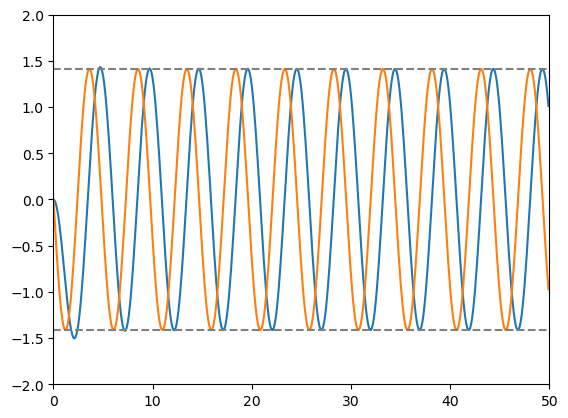

In [34]:
r=np.arange(0,50,0.1)
plt.plot(r,continuumstates_l1_Al27.wavefct_g(r))
plt.plot(r,continuumstates_l1_Al27.wavefct_f(r))
plt.plot(r,r*0+np.sqrt(2),color='gray',linestyle='--')
plt.plot(r,r*0-np.sqrt(2),color='gray',linestyle='--')
plt.ylim(-2,2)
plt.xlim(0,50)

# Crosssection

In [4]:
ai_48Ti=np.array([0.03392,0.05913,0.01547,-0.02550,-0.0152,0.0029,0.0037])
R_48Ti=9.25
nucleus_48Ti = phr.nucleus('48Ti_FB',Z=22,A=48,ai=ai_48Ti,R=R_48Ti)

E= 248.10623026115533 MeV
r0= 0.007000000000000001 fm
rc= 9.1 fm
Calculate phaseshift for kappa= -1 , delta_diff=  -0.2109008606295606
Calculate phaseshift for kappa= -2 , delta_diff=  -0.09104172999031057
Calculate phaseshift for kappa= -3 , delta_diff=  -0.039657053100966344
Calculate phaseshift for kappa= -4 , delta_diff=  -0.015635735284921015
Calculate phaseshift for kappa= -5 , delta_diff=  -0.005460564043894944
Calculate phaseshift for kappa= -6 , delta_diff=  -0.0017483039355692398
Calculate phaseshift for kappa= -7 , delta_diff=  -0.0005568718088619917
Calculate phaseshift for kappa= -8 , delta_diff=  -0.00018835806911265962
Calculate phaseshift for kappa= -9 , delta_diff=  -6.539092411017577e-05
Calculate phaseshift for kappa= -10 , delta_diff=  -2.125702633382076e-05
Calculate phaseshift for kappa= -11 , delta_diff=  -6.06086936727479e-06
Calculate phaseshift for kappa= -12 , delta_diff=  -1.4773084739960751e-06
Calculate phaseshift for kappa= -13 , delta_diff=  -3.067589022

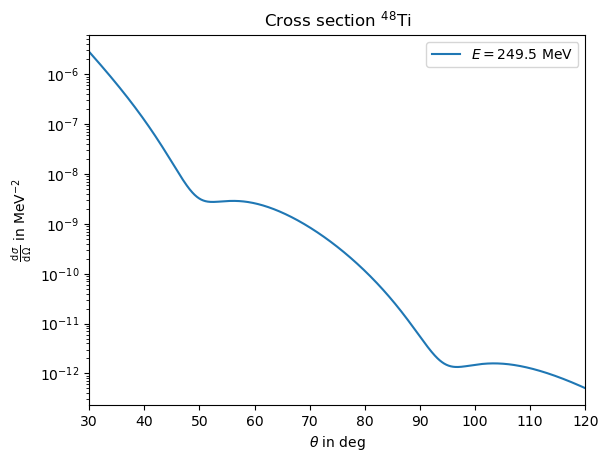

In [5]:
energy=249.5
theta=np.arange(30,120,1e-1)
plt.plot(theta,phr.crosssection_lepton_nucleus_scattering(energy,theta*pi/180,nucleus_48Ti,verbose=True,save_and_load_phase_shifts=True),label=r'$E=249.5~$MeV')
plt.yscale('log')
plt.title(r"Cross section $^{48}$Ti")
plt.xlabel(r"$\theta$ in deg")
plt.ylabel(r"$\frac{\operatorname{d}\sigma}{\operatorname{d}\Omega}$ in MeV$^{-2}$")
plt.legend()
plt.xlim(30,120)
plt.show()

E= 248.10623026115533 MeV
r0= 0.007000000000000001 fm
rc= 9.1 fm
Calculate phaseshift for kappa= -1 , delta_diff=  -0.2109008606295606
Calculate phaseshift for kappa= -2 , delta_diff=  -0.09104172999031057
Calculate phaseshift for kappa= -3 , delta_diff=  -0.039657053100966344
Calculate phaseshift for kappa= -4 , delta_diff=  -0.015635735284921015
Calculate phaseshift for kappa= -5 , delta_diff=  -0.005460564043894944
Calculate phaseshift for kappa= -6 , delta_diff=  -0.0017483039355692398
Calculate phaseshift for kappa= -7 , delta_diff=  -0.0005568718088619917
Calculate phaseshift for kappa= -8 , delta_diff=  -0.00018835806911265962
Calculate phaseshift for kappa= -9 , delta_diff=  -6.539092411017577e-05
Calculate phaseshift for kappa= -10 , delta_diff=  -2.125702633382076e-05
Calculate phaseshift for kappa= -11 , delta_diff=  -6.06086936727479e-06
Calculate phaseshift for kappa= -12 , delta_diff=  -1.4773084739960751e-06
Calculate phaseshift for kappa= -13 , delta_diff=  -3.067589022

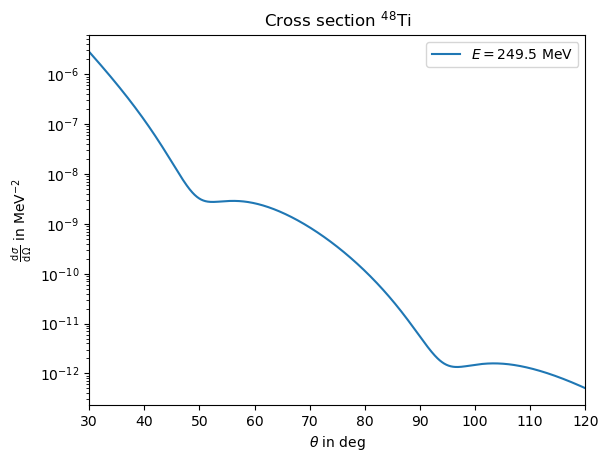

In [6]:
energy=249.5
theta=np.arange(30,120,1e-1)
plt.plot(theta,phr.crosssection_lepton_nucleus_scattering(energy,theta*pi/180,nucleus_48Ti,verbose=True),label=r'$E=249.5~$MeV')
plt.yscale('log')
plt.title(r"Cross section $^{48}$Ti")
plt.xlabel(r"$\theta$ in deg")
plt.ylabel(r"$\frac{\operatorname{d}\sigma}{\operatorname{d}\Omega}$ in MeV$^{-2}$")
plt.legend()
plt.xlim(30,120)
plt.show()

E= 248.10623026115533 MeV
r0= 0.007000000000000001 fm
rc= 9.1 fm
phase differences set to zero after kappa= -22


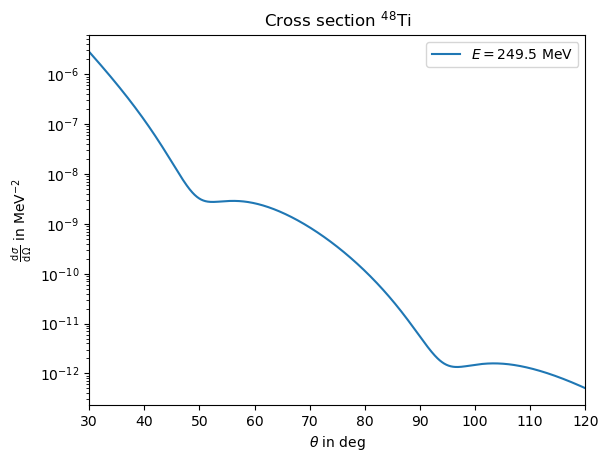

In [7]:
energy=249.5
theta=np.arange(30,120,1e-1)
plt.plot(theta,phr.crosssection_lepton_nucleus_scattering(energy,theta*pi/180,nucleus_48Ti,verbose=True,N_processes=30),label=r'$E=249.5~$MeV')
plt.yscale('log')
plt.title(r"Cross section $^{48}$Ti")
plt.xlabel(r"$\theta$ in deg")
plt.ylabel(r"$\frac{\operatorname{d}\sigma}{\operatorname{d}\Omega}$ in MeV$^{-2}$")
plt.legend()
plt.xlim(30,120)
plt.show()

In [80]:
## assess necessary precision 
# takes a long time, but enables fastest possible evaluation once these are set
# Uncomment to run again (>5min)
energy=249.5
theta=np.arange(30,120,1e-1)
args=phr.optimise_crosssection_precision(energy,theta*pi/180,nucleus_48Ti,crosssection_precision=1e-2)

new best: {'method': 'DOP853', 'N_partial_waves': 250, 'atol': 1e-13, 'rtol': 1e-13, 'energy_norm': 197.3269804, 'phase_difference_limit': 0.0}
time: 4.886132717132568 diff: 0.0
new best: {'method': 'DOP853', 'N_partial_waves': 250, 'atol': 1e-13, 'rtol': 1e-13, 'energy_norm': 197.3269804, 'phase_difference_limit': 1e-15}
time: 4.58647346496582 diff: 0.0
new best: {'method': 'DOP853', 'N_partial_waves': 250, 'atol': 1e-13, 'rtol': 1e-13, 'energy_norm': 197.3269804, 'phase_difference_limit': 1e-14}
time: 4.455778360366821 diff: 6.176656932874421e-11
new best: {'method': 'DOP853', 'N_partial_waves': 250, 'atol': 1e-13, 'rtol': 1e-13, 'energy_norm': 197.3269804, 'phase_difference_limit': 1e-11}
time: 3.947833776473999 diff: 7.1016741546666155e-09
new best: {'method': 'DOP853', 'N_partial_waves': 250, 'atol': 1e-13, 'rtol': 1e-13, 'energy_norm': 197.3269804, 'phase_difference_limit': 1e-10}
time: 3.918998956680298 diff: 7.210163327771003e-08
new best: {'method': 'DOP853', 'N_partial_waves'

In [8]:
# results of the upper call:
args = {'method': 'DOP853', 'N_partial_waves': 20, 'atol': 1e-06, 'rtol': 1e-07, 'energy_norm': 0.01973269804, 'phase_difference_limit': 1e-06}

E= 248.10623026115533 MeV
r0= 0.007000000000000001 fm
rc= 9.1 fm
Calculate phaseshift for kappa= -1 , delta_diff=  -0.2109010314225639
Calculate phaseshift for kappa= -2 , delta_diff=  -0.09104181117908627
Calculate phaseshift for kappa= -3 , delta_diff=  -0.03965712770292762
Calculate phaseshift for kappa= -4 , delta_diff=  -0.01563579219380662
Calculate phaseshift for kappa= -5 , delta_diff=  -0.005460626723511552
Calculate phaseshift for kappa= -6 , delta_diff=  -0.0017483422727568865
Calculate phaseshift for kappa= -7 , delta_diff=  -0.0005569181752340668
Calculate phaseshift for kappa= -8 , delta_diff=  -0.00018838301311796535
Calculate phaseshift for kappa= -9 , delta_diff=  -6.540278073607908e-05
Calculate phaseshift for kappa= -10 , delta_diff=  -2.1261778679004806e-05
Calculate phaseshift for kappa= -11 , delta_diff=  -6.060464588619752e-06
Calculate phaseshift for kappa= -12 , delta_diff=  -1.4774181134047382e-06
Calculate phaseshift for kappa= -13 , delta_diff=  -3.068893534

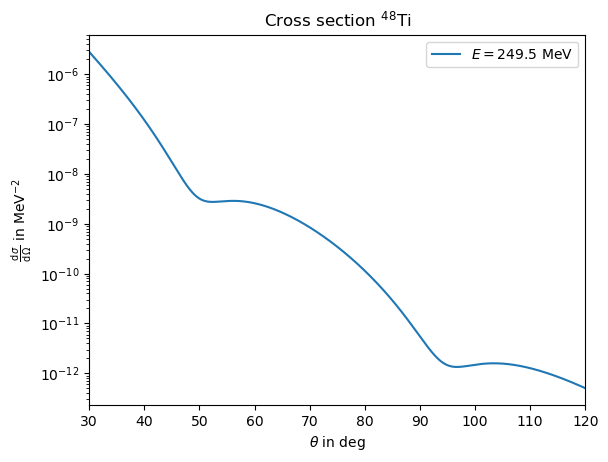

In [9]:
energy=249.5
theta=np.arange(30,120,1e-1)
plt.plot(theta,phr.crosssection_lepton_nucleus_scattering(energy,theta*pi/180,nucleus_48Ti,verbose=True,**args),label=r'$E=249.5~$MeV')
plt.yscale('log')
plt.title(r"Cross section $^{48}$Ti")
plt.xlabel(r"$\theta$ in deg")
plt.ylabel(r"$\frac{\operatorname{d}\sigma}{\operatorname{d}\Omega}$ in MeV$^{-2}$")
plt.legend()
plt.xlim(30,120)
plt.show()

## Numerical

In [41]:
ai_48Ti=np.array([0.03392,0.05913,0.01547,-0.02550,-0.0152,0.0029,0.0037])
R_48Ti=9.25
N_48Ti=len(ai_48Ti)
qi_48Ti = np.arange(1,N_48Ti+1)*np.pi/R_48Ti
def rho_48Ti(r): return phr.nuclei.parameterizations.fourier_bessel.charge_density_FB(r,ai_48Ti,R_48Ti,qi_48Ti)
nucleus_48Ti_num = phr.nucleus('48Ti_num',Z=22,A=48,charge_density=rho_48Ti)

In [42]:
nucleus_48Ti_num.fill_gaps()

data loaded from  ./tmp/nucleus_splines/electric_field_48Ti_num_x=0.0-20.0-0.02.txt
data loaded from  ./tmp/nucleus_splines/electric_potential_48Ti_num_x=0.0-20.0-0.02.txt
data loaded from  ./tmp/nucleus_splines/form_factor_48Ti_num_x=0.0-1000.0-1.0.txt


In [43]:
nucleus_48Ti_num.set_electric_field_from_charge_density()
nucleus_48Ti_num.set_electric_potential_from_electric_field()

data loaded from  ./tmp/nucleus_splines/electric_field_48Ti_num_x=0.0-20.0-0.02.txt
data loaded from  ./tmp/nucleus_splines/electric_potential_48Ti_num_x=0.0-20.0-0.02.txt


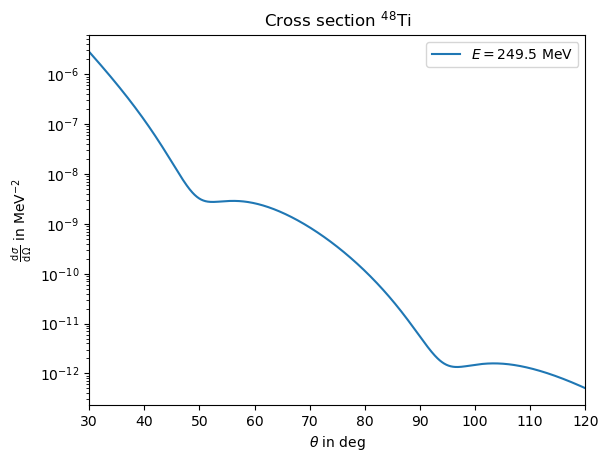

In [44]:
energy=249.5
theta=np.arange(30,120,1e-1)
plt.plot(theta,phr.crosssection_lepton_nucleus_scattering(energy,theta*pi/180,nucleus_48Ti_num),label=r'$E=249.5~$MeV')
plt.yscale('log')
plt.title(r"Cross section $^{48}$Ti")
plt.xlabel(r"$\theta$ in deg")
plt.ylabel(r"$\frac{\operatorname{d}\sigma}{\operatorname{d}\Omega}$ in MeV$^{-2}$")
plt.legend()
plt.xlim(30,120)
plt.show()

# Overlap integrals

In [10]:
# oszillator basis (shell model)
Cs_M00_Al27=np.array([27, -11.3343, 0.837814])
Cs_M01_Al27=np.array([2*13-27, 0.666696, -0.0858552])
Cs_Phipp00_Al27=np.array([-4.98975 , 0.997985])
Cs_Phipp01_Al27=np.array([0.303398 , -0.0606814])
Ci_dict_Al27={'M00':Cs_M00_Al27,'M01':Cs_M01_Al27,'Phipp00':Cs_Phipp00_Al27,'Phipp01':Cs_Phipp01_Al27}
nucleus_osz_Al27 = phr.nucleus('Al27_osz',Z=13,A=27,Ci_dict=Ci_dict_Al27)

In [11]:
phr.overlap_integral_dipole(nucleus_osz_Al27)

0.03457669820312682

In [47]:
phr.overlap_integral_scalar(nucleus_osz_Al27,'p')

0.015270087421136454

In [48]:
phr.overlap_integral_scalar(nucleus_osz_Al27,'n')

0.01624846465024101

In [49]:
phr.overlap_integral_vector(nucleus_osz_Al27,'p')

0.015829828313477956

In [50]:
phr.overlap_integral_vector(nucleus_osz_Al27,'n')

0.016856183794795174

# PVES

In [12]:
# PVES calculations are more time intensive as energies are generally higher and they require extremely high precison on the crosssection

In [22]:
# Example Nucleus from Horowitz 1998

In [26]:
nucleus_Pb208 = phr.nucleus('Pb208_Hor98_095',Z=82,A=208,c=6.4,z=0.54,w=0.32)
def weak_density_model(r,lam,nucleus): return (nucleus.Qw/nucleus.Z)*lam**3*nucleus.charge_density(lam*r)
nucleus_Pb208.weak_density = partial(weak_density_model,lam=0.9502,nucleus=Pb208_test)
nucleus_Pb208.update_dependencies()
nucleus_Pb208.fill_gaps()

data loaded from  ./tmp/nucleus_splines/electric_field_Pb208_Hor98_095fermi3p_x=0.0-20.0-0.02.txt
data loaded from  ./tmp/nucleus_splines/electric_potential_Pb208_Hor98_095fermi3p_x=0.0-20.0-0.02.txt
data loaded from  ./tmp/nucleus_splines/form_factor_Pb208_Hor98_095fermi3p_x=0.0-1000.0-1.0.txt


In [27]:
nucleus_Pb208.__dict__

{'nucleus_type': 'fermi3p',
 'name': 'Pb208_Hor98_095',
 'Z': 82,
 'A': 208,
 'mass': 193729.02478371415,
 'abundance': 0.524,
 'spin': 0.0,
 'parity': 1,
 'Qw': -118.8046,
 'c': 6.4,
 'z': 0.54,
 'w': 0.32,
 'total_charge': 82,
 'polylog2': -71.878123100634,
 'polylog3': -296.9600006450138,
 'polylog4': -939.5400093070426,
 'polylog5': -2427.5806816352906,
 'polylog7': -10271.794682058146,
 'charge_density_norm': 0.057029378832198045,
 'nucleus_num': <phasr.nuclei.parameterizations.numerical.nucleus_num at 0x271ca14afd0>,
 'charge_radius_sq': 30.1413462198941,
 'charge_radius': 5.490113497906405,
 'Vmin_ana': -0.1291961769809547,
 'weak_density': functools.partial(<function weak_density_model at 0x00000271CAD758A0>, lam=0.9502, nucleus=<phasr.nuclei.parameterizations.fermi.nucleus_fermi object at 0x00000271CA36AE90>),
 'weak_potential': <bound method nucleus_base.Vweak of <phasr.nuclei.parameterizations.fermi.nucleus_fermi object at 0x00000271C96C0050>>,
 'form_factor': functools.part

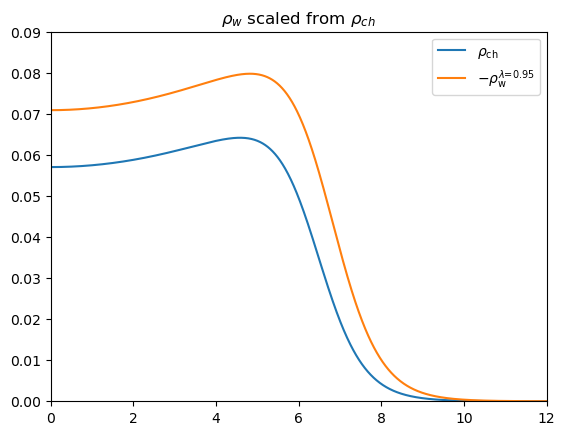

In [16]:
r=np.arange(0,12,1e-2)
plt.title(r'$\rho_w$ scaled from $\rho_{ch}$')
plt.plot(r,nucleus_Pb208.charge_density(r),label=r'$\rho_\operatorname{ch}$')
plt.plot(r,-nucleus_Pb208.weak_density(r),label=r'$-\rho_\operatorname{w}^{\lambda=0.95}$')
plt.xlim(0,12)
plt.ylim(0,0.09)
plt.legend()

In [29]:
theta_deg=np.arange(1,50,1e-1)
E_MeV=850
A_PV_208Pb = phr.left_right_asymmetry_lepton_nucleus_scattering(E_MeV,theta_deg*pi/180,nucleus_Pb208,verbose=True)

Calculate left crosssection ...
E= 846.2705639962488 MeV
r0= 0.0116 fm
rc= 12.6 fm
Calculate phaseshift for kappa= -1 , delta_diff=  1.0459037145851364
Calculate phaseshift for kappa= -2 , delta_diff=  -1.4129033632921768
Calculate phaseshift for kappa= -3 , delta_diff=  -1.1062952343710197
Calculate phaseshift for kappa= -4 , delta_diff=  -0.9076036152309186
Calculate phaseshift for kappa= -5 , delta_diff=  -0.7614301683284679
Calculate phaseshift for kappa= -6 , delta_diff=  -0.6466922548238081
Calculate phaseshift for kappa= -7 , delta_diff=  -0.5530739002717096
Calculate phaseshift for kappa= -8 , delta_diff=  -0.47474493120017014
Calculate phaseshift for kappa= -9 , delta_diff=  -0.40808249888837533
Calculate phaseshift for kappa= -10 , delta_diff=  -0.3506775052890667
Calculate phaseshift for kappa= -11 , delta_diff=  -0.3008436842485469
Calculate phaseshift for kappa= -12 , delta_diff=  -0.25735187760236844
Calculate phaseshift for kappa= -13 , delta_diff=  -0.21927581077319225


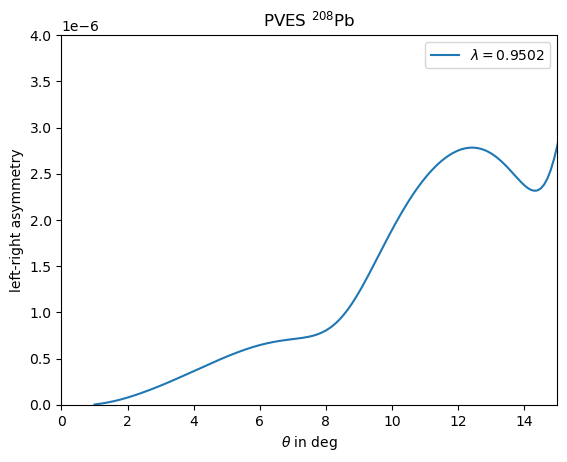

In [34]:
plt.title(r'PVES $^{208}$Pb') #Horowitz 1998
plt.plot(theta_deg,A_PV_208Pb,label=r'$\lambda=0.9502$')
plt.ylim(0,4e-6)
plt.xlim(0,15)
plt.xlabel(r"$\theta$ in deg")
plt.ylabel(r"left-right asymmetry")
plt.legend()

In [63]:
## assess necessary precision 
# takes a long time, but enables faster evaluation once these are set
# Uncomment to run again (>30min)
theta_deg=np.arange(1,50,1e-1)
E_MeV=850
args_APV_208Pb=phr.optimise_left_right_asymmetry_precision(E_MeV,theta_deg*pi/180,nucleus_Pb208,left_right_asymmetry_precision=1e-2)

new best: {'method': 'DOP853', 'N_partial_waves': 250, 'atol': 1e-13, 'rtol': 1e-13, 'energy_norm': 197.3269804, 'phase_difference_limit': 0.0}
time: 109.69080972671509 diff: 0.0
new best: {'method': 'DOP853', 'N_partial_waves': 250, 'atol': 1e-13, 'rtol': 1e-13, 'energy_norm': 197.3269804, 'phase_difference_limit': 1e-14}
time: 104.60813522338867 diff: 9.077660798502816e-08
new best: {'method': 'DOP853', 'N_partial_waves': 250, 'atol': 1e-13, 'rtol': 1e-13, 'energy_norm': 197.3269804, 'phase_difference_limit': 1e-13}
time: 100.85314726829529 diff: 5.144010431866448e-07
new best: {'method': 'DOP853', 'N_partial_waves': 250, 'atol': 1e-13, 'rtol': 1e-13, 'energy_norm': 197.3269804, 'phase_difference_limit': 1e-12}
time: 89.07490277290344 diff: 1.8606549549381466e-07
new best: {'method': 'DOP853', 'N_partial_waves': 250, 'atol': 1e-13, 'rtol': 1e-13, 'energy_norm': 197.3269804, 'phase_difference_limit': 1e-11}
time: 85.72973465919495 diff: 6.263590115247191e-06
new best: {'method': 'DOP8

In [67]:
# results of the upper call:
args = {'method': 'DOP853', 'N_partial_waves': 250, 'atol': 1e-13, 'rtol': 1e-13, 'energy_norm': 197.3269804, 'phase_difference_limit': 1e-08}

In [68]:
theta_deg=np.arange(1,50,1e-1)
E_MeV=850
A_PV_208Pb_opt = phr.left_right_asymmetry_lepton_nucleus_scattering(E_MeV,theta_deg*pi/180,nucleus_Pb208,verbose=True,**args_APV_Pb208)

Calculate left crosssection ...
E= 846.2705639962488 MeV
r0= 0.0116 fm
rc= 12.6 fm
Calculate phaseshift for kappa= -1 , delta_diff=  1.0459037145851346
Calculate phaseshift for kappa= -2 , delta_diff=  -1.4129033632921768
Calculate phaseshift for kappa= -3 , delta_diff=  -1.1062952343710197
Calculate phaseshift for kappa= -4 , delta_diff=  -0.9076036152309186
Calculate phaseshift for kappa= -5 , delta_diff=  -0.7614301683284719
Calculate phaseshift for kappa= -6 , delta_diff=  -0.6466922548238134
Calculate phaseshift for kappa= -7 , delta_diff=  -0.5530739002717096
Calculate phaseshift for kappa= -8 , delta_diff=  -0.47474493120017014
Calculate phaseshift for kappa= -9 , delta_diff=  -0.40808249888837533
Calculate phaseshift for kappa= -10 , delta_diff=  -0.35067750528907027
Calculate phaseshift for kappa= -11 , delta_diff=  -0.30084368424853825
Calculate phaseshift for kappa= -12 , delta_diff=  -0.2573518776023762
Calculate phaseshift for kappa= -13 , delta_diff=  -0.2192758107731887


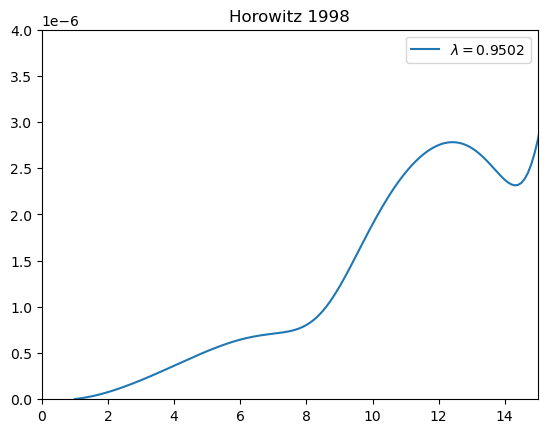

In [69]:
plt.title('Horowitz 1998')
plt.plot(theta_deg,A_PV_208Pb_opt,label=r'$\lambda=0.9502$')
#
plt.ylim(0,4e-6)
plt.xlim(0,15)
plt.legend()